In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
sakura_first_bloom = pd.read_csv('./data/sakura_first_bloom_dates.csv')
sakura_first_bloom

,Site Name,Currently Being Observed,1953,1954,1955,1956,1957,1958,1959,1960,...,2016,2017,2018,2019,2020,2021,2022,2023,30 Year Average 1981-2010,Notes
0,Wakkanai,True,1953-05-21,1954-05-17,1955-05-17,1956-05-12,1957-05-18,1958-05-23,1959-05-03,1960-05-19,...,2016-05-13,2017-05-09,2018-05-12,2019-05-07,2020-05-10,2021-05-08,2022-05-06,2023-05-03,5 13,Sargent cherry (Prunus sargentii)
1,Rumoi,False,1953-05-08,1954-05-11,1955-05-13,1956-05-08,1957-05-10,1958-05-12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Sargent cherry (Prunus sargentii)
2,Asahikawa,True,1953-05-11,1954-05-13,1955-05-09,1956-05-07,1957-05-09,1958-05-10,1959-05-08,1960-05-13,...,2016-05-03,2017-05-03,2018-04-30,2019-05-01,2020-05-03,2021-04-29,2022-04-26,2023-04-25,5 4,Sargent cherry (Prunus sargentii)
3,Abashiri,True,1953-05-24,1954-05-16,1955-05-18,1956-05-09,NaN,NaN,1959-05-03,NaN,...,2016-05-08,2017-05-05,2018-05-02,2019-05-05,2020-05-07,2021-05-06,2022-04-27,2023-04-28,5 10,Sargent cherry (Prunus sargentii)
4,Sapporo,True,1953-05-07,1954-05-04,1955-05-11,1956-05-04,1957-05-09,NaN,1959-05-05,1960-05-05,...,2016-04-25,2017-04-28,2018-04-26,2019-04-24,2020-04-30,2021-04-22,2022-04-23,2023-04-15,5 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Kumejima,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Taiwan cherry (Prunus campanulata)
98,Naha,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-01-21,2017-01-14,2018-01-10,2019-01-10,2020-01-06,2021-01-04,2022-01-11,2023-01-07,1 16,Taiwan cherry (Prunus campanulata)
99,Nago,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Taiwan cherry (Prunus campanulata)
100,Iriomote Island,False,NaN,NaN,1955-01-07,NaN,1957-01-16,NaN,1959-01-12,1960-02-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Taiwan cherry (Prunus campanulata)


In [4]:
sakura_first_bloom.describe()

,Site Name,Currently Being Observed,1953,1954,1955,1956,1957,1958,1959,1960,...,2016,2017,2018,2019,2020,2021,2022,2023,30 Year Average 1981-2010,Notes
count,102,102,79,81,82,84,83,83,86,85,...,58,58,58,58,58,57,58,58,102,21
unique,102,2,42,32,37,39,36,37,38,40,...,29,30,31,29,29,31,34,31,30,4
top,Wakkanai,True,1953-03-26,1954-03-30,1955-03-29,1956-03-28,1957-04-08,1958-04-01,1959-03-23,1960-03-29,...,2016-03-23,2017-04-03,2018-03-23,2019-03-27,2020-03-23,2021-03-17,2022-03-21,2023-03-22,-,Sargent cherry (Prunus sargentii)
freq,1,58,6,7,8,7,7,9,10,10,...,12,6,5,7,6,5,6,9,44,10


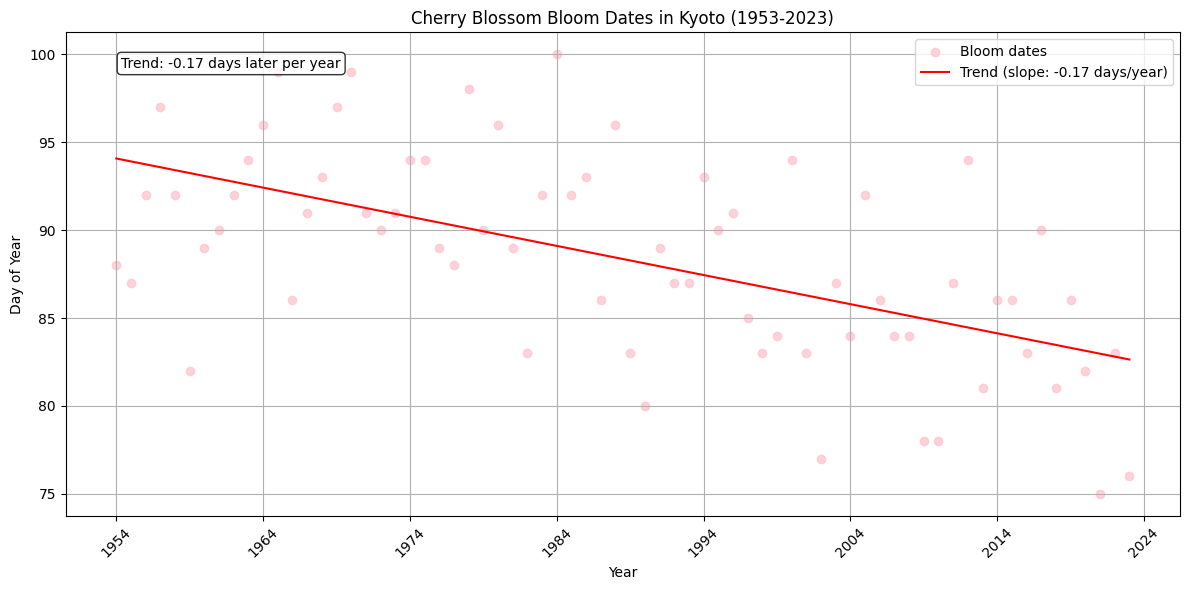

In [5]:
# Select Kyoto data and prepare it
location = 'Kyoto'
years = sakura_first_bloom.columns[3:-2].astype(int)  # Convert year columns to integers
bloom_dates = pd.to_datetime(sakura_first_bloom.loc[sakura_first_bloom['Site Name'] == location, years.astype(str)].iloc[0])

# Convert dates to day of year for easier trend analysis
bloom_days = bloom_dates.dt.dayofyear

# Calculate trend line
slope, intercept, r_value, p_value, std_err = stats.linregress(years, bloom_days)
trend_line = slope * years + intercept

# Create the plot
plt.figure(figsize=(12, 6))
plt.scatter(years, bloom_days, color='pink', alpha=0.7, label='Bloom dates')
plt.plot(years, trend_line, color='red', label=f'Trend (slope: {slope:.2f} days/year)')

plt.title(f'Cherry Blossom Bloom Dates in {location} (1953-2023)')
plt.xlabel('Year')
plt.ylabel('Day of Year')
plt.legend()

# Customize x-axis ticks
plt.xticks(np.arange(min(years), max(years)+2, 10), rotation=45)

# Add text to explain the trend
trend_text = f"Trend: {slope:.2f} days later per year"
plt.text(0.05, 0.95, trend_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.grid(True)
plt.show()

In [7]:
# Prepare data for plotting
all_sites = sakura_first_bloom['Site Name'].unique()
city_data = []

for site in all_sites:
    site_bloom_dates = sakura_first_bloom[sakura_first_bloom['Site Name'] == site].iloc[0, 3:-2]
    site_bloom_dates = pd.to_datetime(site_bloom_dates, format='%Y-%m-%d', errors='coerce')
    city_data.append(pd.DataFrame({
        'Site': site,
        'Year': site_bloom_dates.index.astype(int),
        'BloomDay': site_bloom_dates.dt.dayofyear
    }))

all_site_data = pd.concat(city_data)
all_site_data

,Site,Year,BloomDay
1954,Wakkanai,1954,137.0
1955,Wakkanai,1955,137.0
1956,Wakkanai,1956,133.0
1957,Wakkanai,1957,138.0
1958,Wakkanai,1958,143.0
...,...,...,...
2019,Minami Daito Island,2019,25.0
2020,Minami Daito Island,2020,37.0
2021,Minami Daito Island,2021,NaN
2022,Minami Daito Island,2022,28.0


In [8]:
# Calculate average bloom day and trend for each site
site_stats = all_site_data.groupby('Site').agg({
    'BloomDay': ['mean', 'min', 'max'],
    'Year': ['min', 'max']
}).reset_index()

site_stats.columns = ['Site', 'MeanBloomDay', 'MinBloomDay', 'MaxBloomDay', 'StartYear', 'EndYear']
site_stats


,Site,MeanBloomDay,MinBloomDay,MaxBloomDay,StartYear,EndYear
0,Abashiri,130.923077,117.0,145.0,1954,2023
1,Aikawa,102.277778,92.0,118.0,1954,2023
2,Akita,108.528571,94.0,121.0,1954,2023
3,Aomori,114.558824,97.0,132.0,1954,2023
4,Asahikawa,126.357143,113.0,138.0,1954,2023
...,...,...,...,...,...,...
97,Yakushima,84.000000,84.0,84.0,1954,2023
98,Yamagata,105.171429,90.0,120.0,1954,2023
99,Yokohama,85.657143,74.0,101.0,1954,2023
100,Yonago,92.254545,79.0,105.0,1954,2023


In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create custom x-coordinates with increased spacing
x_coords = np.arange(len(site_stats)) * 2.5  # Increased multiplier from 1.5 to 2.5

# Create the plot
fig = make_subplots(rows=1, cols=1, subplot_titles=['Cherry Blossom Bloom Dates in Japanese Sites (1953-2023)'])

# Add scatter plot for average bloom day
fig.add_trace(
    go.Scatter(
        x=x_coords,
        y=site_stats['MeanBloomDay'],
        mode='markers',
        marker=dict(color='pink', size=10),
        name='Average Bloom Day'
    )
)

# Add error bars
fig.add_trace(
    go.Scatter(
        x=x_coords,
        y=site_stats['MinBloomDay'],
        mode='lines',
        line=dict(color='gray', width=0),
        showlegend=False
    )
)

fig.add_trace(
    go.Scatter(
        x=x_coords,
        y=site_stats['MaxBloomDay'],
        mode='lines',
        line=dict(color='gray', width=0),
        fill='tonexty',
        fillcolor='rgba(128, 128, 128, 0.2)',
        name='Bloom Day Range'
    )
)

# Customize the layout
fig.update_layout(
    title=dict(text='Cherry Blossom Bloom Dates in Japanese Sites (1953-2023)', font=dict(size=24)),
    xaxis=dict(
        title='City',
        titlefont=dict(size=22),
        tickmode='array',
        tickvals=x_coords,
        ticktext=site_stats['Site'],
        tickangle=70,
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title='Day of Year',
        titlefont=dict(size=22),
        tickfont=dict(size=14),
        gridcolor='lightgray',
        gridwidth=1,
        griddash='dash'
    ),
    showlegend=True,
    legend=dict(font=dict(size=14)),
    height=800,
    width=1500,  # Increased width to accommodate wider spacing
    margin=dict(b=150, l=50, r=50, t=100),  # Adjusted margins
    plot_bgcolor='white',  # Set plot background to white
    paper_bgcolor='white'  # Set paper background to white
)

# Update x-axis to show all labels
fig.update_xaxes(range=[-1, max(x_coords) + 1])

# Show the plot
fig.show()

In [16]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Prepare the data
all_site_data['Year'] = pd.to_numeric(all_site_data['Year'], errors='coerce')
yearly_stats = all_site_data.groupby('Year')['BloomDay'].agg(['mean', 'std', 'min', 'max']).reset_index()

# Create the plot
fig = go.Figure()

# Add the mean line
fig.add_trace(go.Scatter(
    x=yearly_stats['Year'],
    y=yearly_stats['mean'],
    mode='lines',
    name='Mean Bloom Day',
    line=dict(color='rgb(255, 100, 100)', width=2)
))

# Add the error band (±1 standard deviation)
fig.add_trace(go.Scatter(
    x=yearly_stats['Year'].tolist() + yearly_stats['Year'].tolist()[::-1],
    y=(yearly_stats['mean'] - yearly_stats['std']).tolist() + (yearly_stats['mean'] + yearly_stats['std']).tolist()[::-1],
    fill='toself',
    fillcolor='rgba(255, 100, 100, 0.2)',
    line=dict(color='rgba(255, 100, 100, 0)'),
    name='±1 Std Dev'
))

# Add min and max lines
fig.add_trace(go.Scatter(
    x=yearly_stats['Year'],
    y=yearly_stats['min'],
    mode='lines',
    line=dict(color='rgba(200, 200, 200, 0.5)', width=1, dash='dash'),
    name='Earliest Bloom'
))

fig.add_trace(go.Scatter(
    x=yearly_stats['Year'],
    y=yearly_stats['max'],
    mode='lines',
    line=dict(color='rgba(200, 200, 200, 0.5)', width=1, dash='dash'),
    name='Latest Bloom'
))

# Customize the layout
fig.update_layout(
    title='Cherry Blossom Bloom Dates Trend (1953-2023)',
    xaxis_title='Year',
    yaxis_title='Day of Year',
    yaxis=dict(range=[0, 150], dtick=30),
    xaxis=dict(tickmode='linear', dtick=10),
    legend=dict(x=0.02, y=0.98, bgcolor='rgba(255, 255, 255, 0.8)'),
    hovermode='x unified',
    height=600,
    width=1000,
)

# Show the plot
fig.show()

# Print summary statistics for each decade
all_site_data['Decade'] = (all_site_data['Year'] // 10) * 10
summary = all_site_data.groupby('Decade')['BloomDay'].agg(['mean', 'median', 'std']).round(2)
print(summary)

         mean  median    std
Decade                      
1950    96.28    93.0  19.81
1960    99.89    96.0  22.09
1970    98.61    95.0  34.46
1980    96.51    95.0  34.21
1990    91.69    91.0  30.95
2000    90.31    89.0  28.14
2010    89.47    87.5  32.28
2020    82.99    82.0  23.18
